In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

F:\Xinyu\AppData\Local\Continuum\Anaconda\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)
:0: FutureWarning: IPython widgets are experimental and may change in the future.


**Manually labeled categories**

- 0	jazz
- 1	choral
- 2	theatre
- 3	dance
- 4	chamber
- 5	orchestra
- 6	other
- 7	opera
- 8	soloist


In [2]:
manual_labels = pd.read_csv('manual_labels.csv', header=None, usecols=[0, 1], names=['index', 'label'])

In [3]:
manual_labels.shape

(144, 2)

In [4]:
df = pd.read_csv('./data/ums_viz.csv')
df_perf = pd.read_pickle('descriptions.pkl')
df_perf.columns.values[0] = 'perf_name'
df_perf = df_perf.append(pd.DataFrame({'perf_name': ['Usher party'], 'description':['NA']}, index=[143]))

df['perf_name'] = df['perf_name'].apply(lambda x: x.strip())
df_perf['perf_name'] = df_perf['perf_name'].apply(lambda x: x.strip())

df['per_seat'] = df['tck_amt']/df['num_seats']

df_perf['label'] = manual_labels.label

In [5]:
df_label = df.merge(df_perf, on='perf_name')

### Question 1: where do people come from?

In [6]:
## simple functions to transform the zip code

def for_9_digits_zip_code(zip_code):
    """
    for zip codes XXXXX-XXXX, just get the first five digits
    """
    if len(zip_code) == 9:
        return zip_code[:6]
    else:
        return zip_code

def rough_loc_name(zip_code):
    if len(zip_code) == 5:
        return 'US'
    elif len(zip_code) == 6:
        return 'CAN'
    else:
        return 'OTHER'

In [7]:
df_label['zip_code'] =df_label.postal_code.apply(for_9_digits_zip_code)
df_label['rough_area'] = df_label.zip_code.apply(rough_loc_name)
df_label.head(3)

,UMS_acct_no,acct_created,cust_type,perf_name,perf_dt,tck_amt,num_seats,venue,price_type,price_type_group,mode_of_sale,sales_channel,order_dt,postal_code,per_seat,description,label,zip_code,rough_area
0,1111,1979-08-06 00:00:00.000,Household,The Infernal Comedy,2011-10-01 20:00:00.000,112.0,2,Hill Auditorium,Choral Union,Subs Prices,Subscription,Fax,2011-05-31 00:00:00.000,48103,56.0,John Malkovich makes his UMS debut portraying ...,2,48103,US
1,1115,1988-02-18 00:00:00.000,Household,The Infernal Comedy,2011-10-01 20:00:00.000,136.0,2,Hill Auditorium,Choral Union,Subs Prices,Subscription,Phone,2011-06-03 00:00:00.000,48105,68.0,John Malkovich makes his UMS debut portraying ...,2,48105,US
2,1131,1988-02-26 00:00:00.000,Household,The Infernal Comedy,2011-10-01 20:00:00.000,136.0,2,Hill Auditorium,Choral Union,Subs Prices,Subscription,Phone,2011-05-19 00:00:00.000,537112216,68.0,John Malkovich makes his UMS debut portraying ...,2,537112,CAN


### zip code distribution
Here I will plot for different length of zip code the distribution of the purchase records, the same plot for different areas (US, CAN, OTHER).

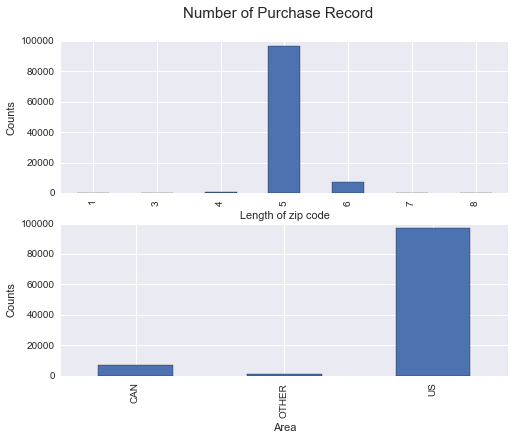

In [8]:
# plot 1: distribution of purchase record for different areas
df_label['zip_code_len'] = df_label.zip_code.apply(lambda x: len(x))

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=False)
plt.suptitle('Number of Purchase Record', fontsize=15)

df_label.rough_area.groupby(df_label.zip_code_len).count().plot(kind='bar', ax=ax1)
ax1.set_xlabel('Length of zip code')
ax1.set_ylabel('Counts')

df_label.rough_area.groupby(df_label.rough_area).count().plot(kind='bar', ax=ax2)
ax2.set_xlabel('Area')
ax2.set_ylabel('Counts')

Let's take a look at number of tickets purchased for different locations.

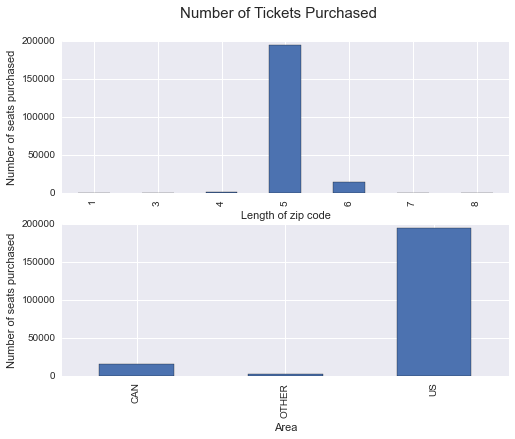

In [9]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=False)

plt.suptitle('Number of Tickets Purchased',fontsize=15)

df_label.num_seats.groupby(df_label.zip_code_len).sum().plot(kind='bar', ax=ax1)
ax1.set_xlabel('Length of zip code')
ax1.set_ylabel('Number of seats purchased')

df_label.num_seats.groupby(df_label.rough_area).sum().plot(kind='bar', ax=ax2)
ax2.set_xlabel('Area')
ax2.set_ylabel('Number of seats purchased')

Total revenues.

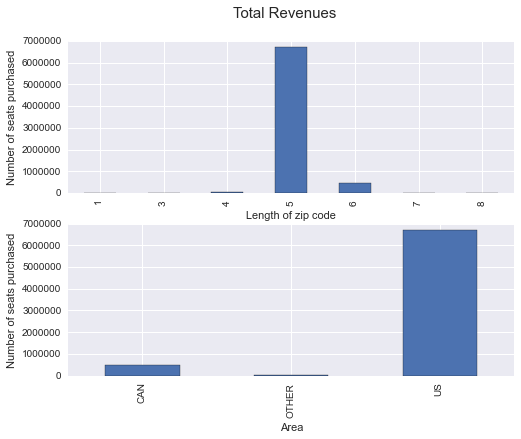

In [10]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=False)

plt.suptitle('Total Revenues',fontsize=15)

df_label.tck_amt.groupby(df_label.zip_code_len).sum().plot(kind='bar', ax=ax1)
ax1.set_xlabel('Length of zip code')
ax1.set_ylabel('Number of seats purchased')

df_label.tck_amt.groupby(df_label.rough_area).sum().plot(kind='bar', ax=ax2)
ax2.set_xlabel('Area')
ax2.set_ylabel('Number of seats purchased')

Average cost per ticket.

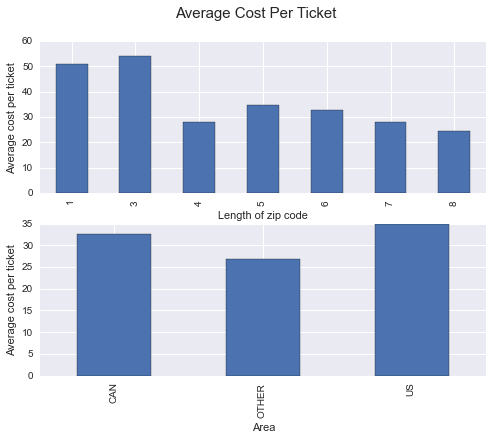

In [11]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=False)

plt.suptitle('Average Cost Per Ticket',fontsize=15)

df_label.per_seat.groupby(df_label.zip_code_len).mean().plot(kind='bar', ax=ax1)
ax1.set_xlabel('Length of zip code')
ax1.set_ylabel('Average cost per ticket')

df_label.per_seat.groupby(df_label.rough_area).mean().plot(kind='bar', ax=ax2)
ax2.set_xlabel('Area')
ax2.set_ylabel('Average cost per ticket')

US people tend to buy slightly more expensive tickets, but zip code with length 1 and 3 buy most expensive tickets on average.

### Preferences for different areas' people

People from different area may have different preferences in their taste, purchase method, subscription, etc. Next, I will explore this aspect

In [12]:
def log_sum(x):
    return np.log2(x.sum())

F:\Xinyu\AppData\Local\Continuum\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


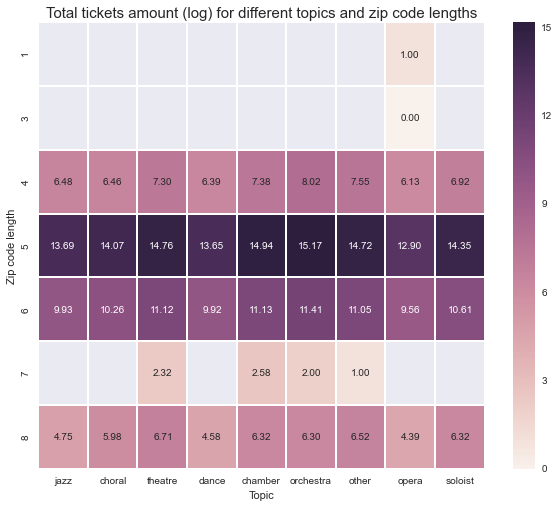

In [13]:
x = df_label.pivot_table('num_seats', index='zip_code_len', columns='label', aggfunc=log_sum)
x = x.rename(columns={0: 'jazz', 1: 'choral', 2: 'theatre', 3: 'dance', 4: 'chamber', 5: 'orchestra', 6: 'other', 7: 'opera', 
                  8: 'soloist'})
plt.figure(figsize=(10, 8))
plt.title('Total tickets amount (log) for different topics and zip code lengths', fontsize=15)
sns.heatmap(x, annot=True, fmt='.2f',linewidths=.5)
plt.xlabel('Topic')
plt.ylabel('Zip code length')

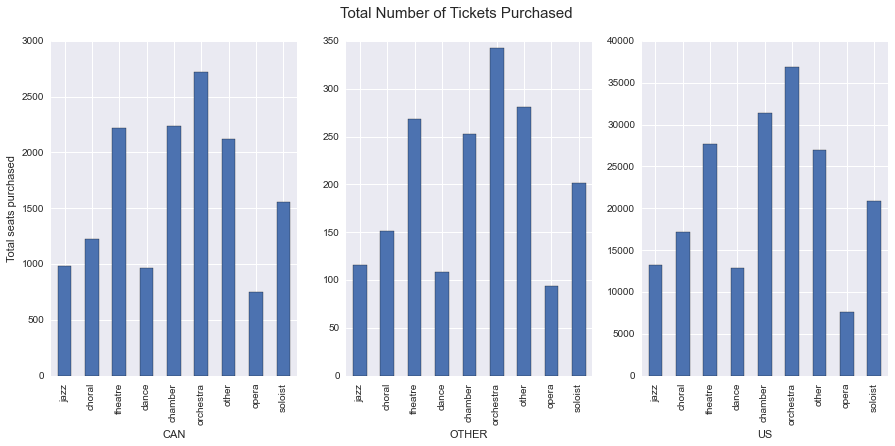

In [14]:
x = df_label.pivot_table('num_seats', index='rough_area', columns='label', aggfunc='sum')
x = x.rename(columns={0: 'jazz', 1: 'choral', 2: 'theatre', 3: 'dance', 4: 'chamber', 5: 'orchestra', 6: 'other', 7: 'opera', 
                  8: 'soloist'})
f, axes = plt.subplots(1,3, figsize=[15, 6])
plt.suptitle('Total Number of Tickets Purchased', fontsize=15)
for i, area in enumerate(x.index):
    x.ix[area].plot(kind='bar', ax=axes[i])
    axes[i].set_xlabel(area)
axes[0].set_ylabel('Total seats purchased')

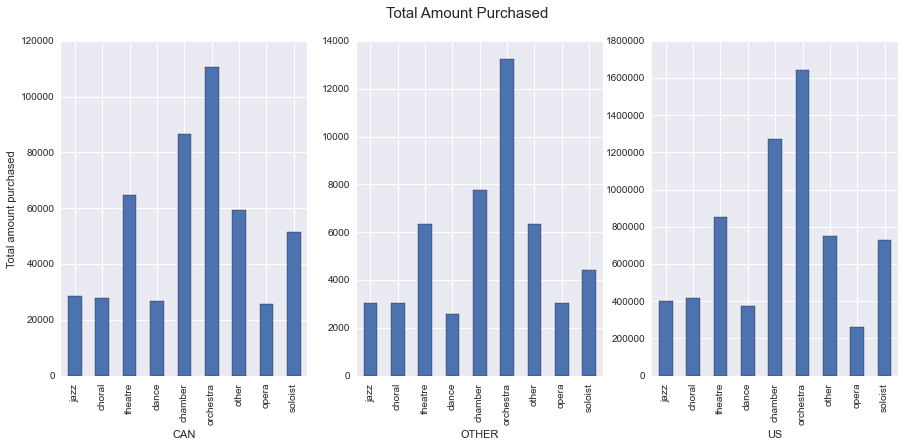

In [15]:
x = df_label.pivot_table('tck_amt', index='rough_area', columns='label', aggfunc='sum')
x = x.rename(columns={0: 'jazz', 1: 'choral', 2: 'theatre', 3: 'dance', 4: 'chamber', 5: 'orchestra', 6: 'other', 7: 'opera', 
                  8: 'soloist'})
f, axes = plt.subplots(1,3, figsize=[15, 6])
plt.suptitle('Total Amount Purchased', fontsize=15)
for i, area in enumerate(x.index):
    x.ix[area].plot(kind='bar', ax=axes[i])
    axes[i].set_xlabel(area)
axes[0].set_ylabel('Total amount purchased')

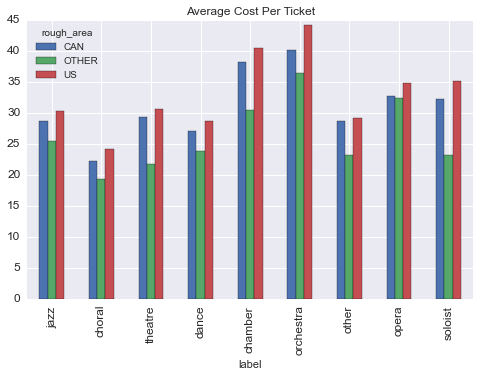

In [16]:
x = df_label.pivot_table('per_seat', index='label', columns='rough_area', aggfunc='mean')
x = x.rename(index={0: 'jazz', 1: 'choral', 2: 'theatre', 3: 'dance', 4: 'chamber', 5: 'orchestra', 6: 'other', 7: 'opera', 
                  8: 'soloist'})
x.plot(kind='bar', figsize=(8, 5), title='Average Cost Per Ticket', fontsize=12)

US people tend to spend more on tickets.

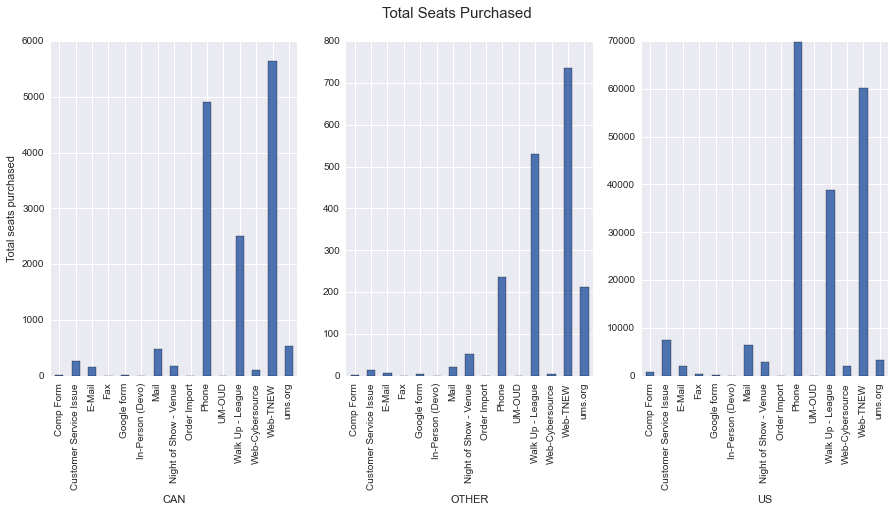

In [17]:
x = df_label.pivot_table('num_seats', index='rough_area', columns='sales_channel', aggfunc='sum')

f, axes = plt.subplots(1,3, figsize=[15, 6])
plt.suptitle('Total Seats Purchased', fontsize=15)
for i, area in enumerate(x.index):
    x.ix[area].plot(kind='bar', ax=axes[i])
    axes[i].set_xlabel(area)
axes[0].set_ylabel('Total seats purchased')

### More analysis on US purchases

In [40]:
zipcode_db = pd.read_csv('zip_code_database.csv')

In [41]:
df_label_US = df_label.ix[df_label.zip_code_len==5]

In [39]:
# turns out the 3 digit zip code just has one record, maybe we can just ignore it
df_label.ix[df_label.zip_code_len==3]

,UMS_acct_no,acct_created,cust_type,perf_name,perf_dt,tck_amt,num_seats,venue,price_type,price_type_group,mode_of_sale,sales_channel,order_dt,postal_code,per_seat,description,label,zip_code,rough_area,zip_code_len
55408,209839,2011-12-31 14:23:38.467,Individual,Einstein on the Beac,2012-01-21 19:00:00.000,54.0,1,Power Center,Adult inc 1,Regular Prices,Web - UMS - Single,Web-TNEW,2011-12-31 14:20:58.480,667,54.0,“The most beautiful thing we can experience is...,7,667,OTHER,3


In [46]:
def find_latitude(zipcode):
    return zipcode_db.ix[zipcode_db.zip==int(zipcode)].latitude
def find_longitude(zipcode):
    return izpcode_db.ix[zipcode_db.zp==int(zipcode)].longitude

In [49]:
zipcode_db = zipcode_db.rename(columns={'zip':'zip_code'})
zipcode_db.head()

,zip_code,type,primary_city,acceptable_cities,unacceptable_cities,state,county,timezone,area_codes,latitude,longitude,world_region,country,decommissioned,estimated_population,notes
0,544,UNIQUE,Holtsville,NaN,Irs Service Center,NY,Suffolk County,America/New_York,631,40.81,-73.04,NaN,US,0,0,NaN
1,601,STANDARD,Adjuntas,NaN,"Colinas Del Gigante, Jard De Adjuntas, Urb San...",PR,Adjuntas,America/Puerto_Rico,"787,939",18.16,-66.72,NaN,US,0,0,NaN
2,602,STANDARD,Aguada,NaN,"Alts De Aguada, Bo Guaniquilla, Comunidad Las ...",PR,NaN,NaN,"787,939",18.38,-67.18,NaN,US,0,0,NaN
3,603,STANDARD,Aguadilla,Ramey,"Bda Caban, Bda Esteves, Bo Borinquen, Bo Ceiba...",PR,Aguadilla,America/Puerto_Rico,787,18.43,-67.15,NaN,US,0,0,NaN
4,604,PO BOX,Aguadilla,Ramey,NaN,PR,NaN,NaN,NaN,18.43,-67.15,NaN,US,0,0,NaN


In [55]:
df_label_US.zip_code = df_label_US.zip_code.apply(lambda x: int(x))
df_label_US = df_label_US.merge(zipcode_db, on='zip_code')
df_label_US.head(3)

,UMS_acct_no,acct_created,cust_type,perf_name,perf_dt,tck_amt,num_seats,venue,price_type,price_type_group,...,county,timezone,area_codes,latitude,longitude,world_region,country,decommissioned,estimated_population,notes
0,1111,1979-08-06 00:00:00.000,Household,The Infernal Comedy,2011-10-01 20:00:00.000,112.0,2,Hill Auditorium,Choral Union,Subs Prices,...,Washtenaw County,America/Detroit,734,42.27,-83.73,NaN,US,0,44859,NaN
1,1217,1988-02-10 00:00:00.000,Household,The Infernal Comedy,2011-10-01 20:00:00.000,74.0,2,Hill Auditorium,Choral Union,Subs Prices,...,Washtenaw County,America/Detroit,734,42.27,-83.73,NaN,US,0,44859,NaN
2,1306,1988-02-10 00:00:00.000,Household,The Infernal Comedy,2011-10-01 20:00:00.000,136.0,2,Hill Auditorium,Choral Union,Subs Prices,...,Washtenaw County,America/Detroit,734,42.27,-83.73,NaN,US,0,44859,NaN


In [61]:
tck_amt_zip_code = df_label_US.num_seats.groupby(df_label_US.zip_code).sum()

In [62]:
import folium
from folium import plugins
data = (np.random.normal(size=(100, 3)) *
        np.array([[1, 1, 1]]) +
        np.array([[48, 5, 1]])).tolist()

In [63]:
data

[[48.66319625803999, 4.409557210255788, 0.7440359353495074],
 [46.63375301937063, 5.582740345982539, 1.9810752501287112],
 [48.65609982126096, 5.079775915780305, 1.5118905176806967],
 [48.22280048825661, 6.056696273763686, 0.25770235641652417],
 [47.27108062419487, 4.619544458411423, 3.0075228632235405],
 [49.03616424476633, 4.16451303876036, 1.5900894549254092],
 [47.83266651358944, 5.284477012240988, 0.3619215786386043],
 [48.240412144703654, 4.27138066071695, 1.4369518240663812],
 [48.45069269002788, 5.298018400831405, 2.428486873058003],
 [49.65654237016066, 3.914351025109946, 1.4230057913069343],
 [48.5008405998562, 5.644435827703285, 1.0960625901245409],
 [47.568715352512335, 3.747759928087508, 0.12760146873264877],
 [46.41178261707872, 4.211769882340333, 0.1943901999495774],
 [46.472868815855584, 5.1648600287225515, 2.565212133928787],
 [47.62628916079498, 5.505657633516211, 0.6575580040309047],
 [47.483023017693306, 4.96710578331407, 1.340497052946083],
 [48.186698551360855, 5.

In [194]:
mapa = folium.Map([48., 5.], tiles='stamentoner', zoom_start=6)
#mapa.add_children(plugins.HeatMap(data))
#mapa

In [32]:
zipcode_db = pd.read_csv('zip_code_database.csv')

,zip,type,primary_city,acceptable_cities,unacceptable_cities,state,county,timezone,area_codes,latitude,longitude,world_region,country,decommissioned,estimated_population,notes
0,544,UNIQUE,Holtsville,NaN,Irs Service Center,NY,Suffolk County,America/New_York,631,40.81,-73.04,NaN,US,0,0,NaN
1,601,STANDARD,Adjuntas,NaN,"Colinas Del Gigante, Jard De Adjuntas, Urb San...",PR,Adjuntas,America/Puerto_Rico,"787,939",18.16,-66.72,NaN,US,0,0,NaN
2,602,STANDARD,Aguada,NaN,"Alts De Aguada, Bo Guaniquilla, Comunidad Las ...",PR,NaN,NaN,"787,939",18.38,-67.18,NaN,US,0,0,NaN
3,603,STANDARD,Aguadilla,Ramey,"Bda Caban, Bda Esteves, Bo Borinquen, Bo Ceiba...",PR,Aguadilla,America/Puerto_Rico,787,18.43,-67.15,NaN,US,0,0,NaN
4,604,PO BOX,Aguadilla,Ramey,NaN,PR,NaN,NaN,NaN,18.43,-67.15,NaN,US,0,0,NaN


In [35]:
zipcode_db.ix[zipcode_db.zip==48105]


,zip,type,primary_city,acceptable_cities,unacceptable_cities,state,county,timezone,area_codes,latitude,longitude,world_region,country,decommissioned,estimated_population,notes
20962,48105,STANDARD,Ann Arbor,NaN,"Ann Arbor Township, Barton Hills, Dixboro, Sup...",MI,Washtenaw County,America/Detroit,734,42.27,-83.73,NaN,US,0,25072,NaN
